In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('updatedMLdataset.csv')


In [3]:
data.head()

,ID,additions,deletions,num_easy_y1,year,status
0,1,1,1,0,2010,new
1,2,73,27,0,2010,new
2,3,3,1,0,2011,new
3,4,93,44,0,2011,new
4,5,5078,5083,0,2011,new


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 6 columns):
ID             3942 non-null int64
additions      3942 non-null int64
deletions      3942 non-null int64
num_easy_y1    3942 non-null int64
year           3942 non-null int64
status         3942 non-null object
dtypes: int64(5), object(1)
memory usage: 184.9+ KB


In [5]:
data.describe()

,ID,additions,deletions,num_easy_y1,year
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,1971.500000,2495.765855,2051.786910,0.763064,2015.918316
std,1138.101709,16750.618876,14595.924814,4.284855,1.894697
min,1.000000,0.000000,0.000000,0.000000,2010.000000
25%,986.250000,5.000000,2.000000,0.000000,2015.000000
50%,1971.500000,38.000000,12.000000,0.000000,2016.000000
75%,2956.750000,243.750000,103.750000,0.000000,2017.000000
max,3942.000000,473390.000000,324804.000000,128.000000,2019.000000


In [6]:
data['status'].value_counts()

new             3354
intermediate     541
advanced          47
Name: status, dtype: int64

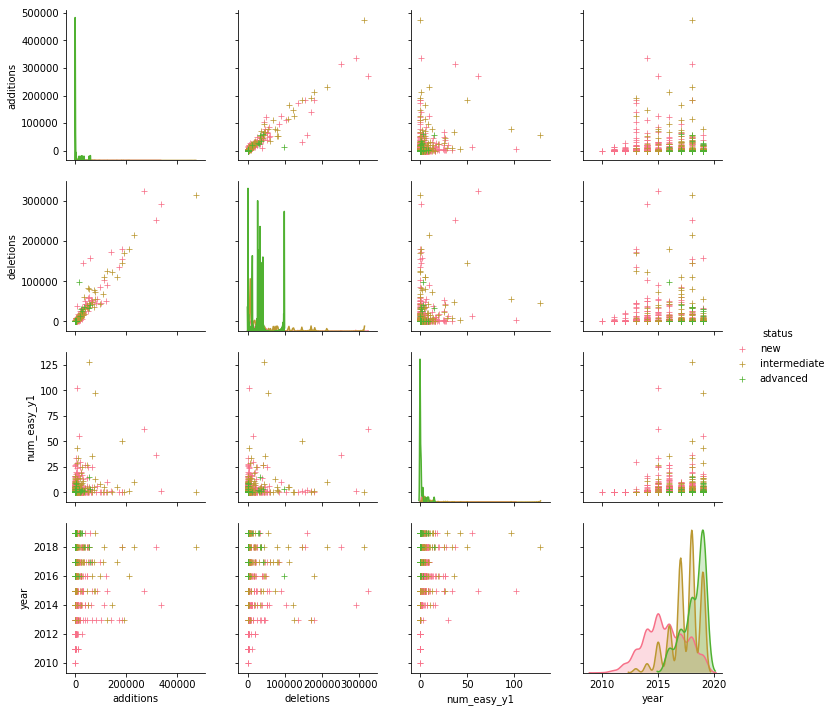

In [7]:
tmp = data.drop('ID', axis=1)
g = sns.pairplot(tmp, hue='status', markers='+')
plt.show()

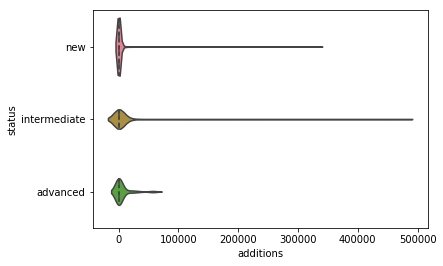

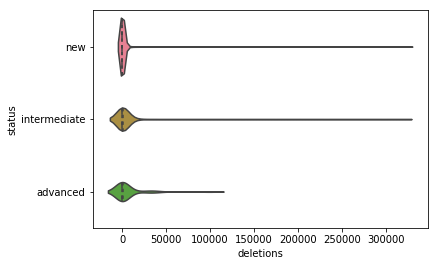

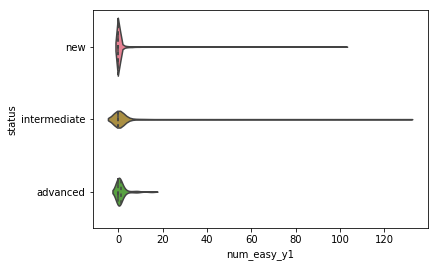

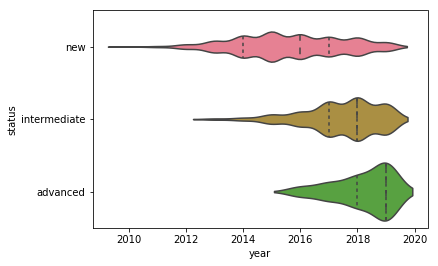

In [8]:
g = sns.violinplot(y='status', x='additions', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='deletions', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='num_easy_y1', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='year', data=data, inner='quartile')
plt.show()

In [9]:
X = data.drop(['ID', 'status'], axis=1)
y = data['status']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(3942, 4)
(3942,)


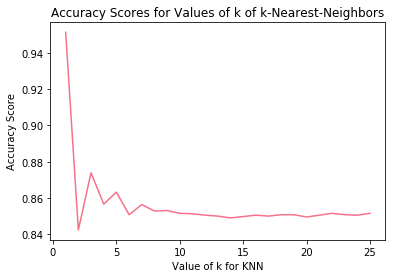

In [10]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [11]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8510908168442415


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2365, 4)
(2365,)
(1577, 4)
(1577,)


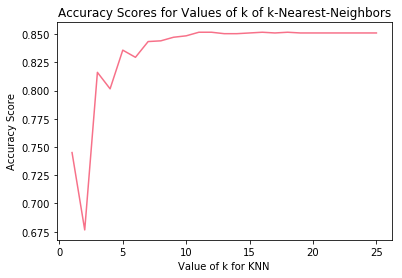

In [13]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8522511097019657


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[78, 7, 3, 2017]]) #this user made 78 additions, 7 deletions, 3 easy labels, and was in year 2017 #I assume this will yield a new user

array(['new'], dtype=object)

In [16]:
knn.predict([[79800, 7, 0, 2019]]) 

array(['intermediate'], dtype=object)

In [17]:
knn.predict([[79800, 7, 0, 2011]]) 

array(['intermediate'], dtype=object)

In [18]:
knn.predict([[79800, 7, 0, 2020]]) 

array(['intermediate'], dtype=object)

In [19]:
knn.predict([[79800, 7, 0, 2090]]) 

array(['intermediate'], dtype=object)

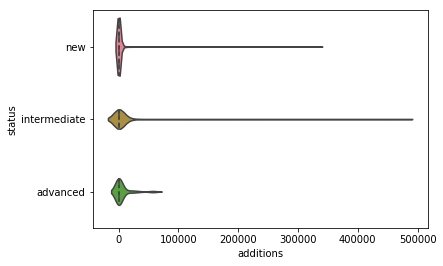

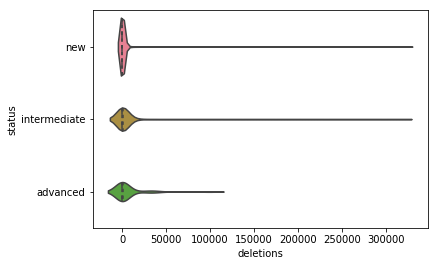

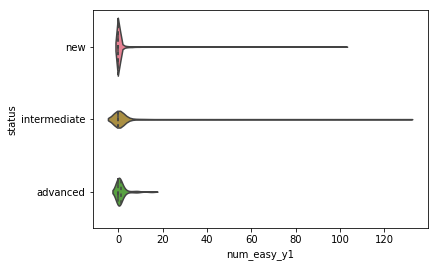

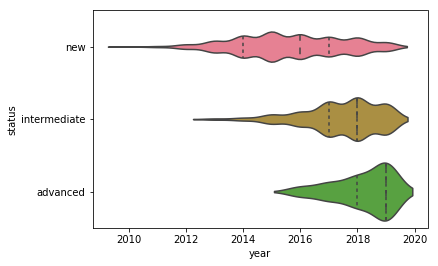

In [20]:
g = sns.violinplot(y='status', x='additions', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='deletions', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='num_easy_y1', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='year', data=data, inner='quartile')
plt.show()

In [21]:
gk = data.groupby("status")

In [22]:
gk.describe()

ID                                                     \
               count         mean          std     min      25%     50%   
status                                                                    
advanced        47.0  3322.425532   593.177103  1731.0  3059.50  3608.0   
intermediate   541.0  2876.451017   807.170079   145.0  2446.00  3018.0   
new           3354.0  1806.600775  1108.039625     1.0   853.25  1733.5   

                             additions               ... num_easy_y1         \
                 75%     max     count         mean  ...         75%    max   
status                                               ...                      
advanced      3777.5  3930.0      47.0  5305.574468  ...         1.0   15.0   
intermediate  3553.0  3937.0     541.0  6878.578558  ...         0.0  128.0   
new           2717.5  3942.0    3354.0  1749.444246  ...         0.0  102.0   

                year                                                         \
               count         mean       std     min     25%     50%     75%   
status                                                                        
advanced        47.0  2018.191489  0.992106  2016.0  2018.0  2019.0  2019.0   
intermediate   541.0  2017.426987  1.322432  2013.0  2017.0  2018.0  2018.0   
new           3354.0  2015.643113  1.846302  2010.0  2014.0  2016.0  2017.0   

                      
                 max  
status                
advanced      2019.0  
intermediate  2019.0  
new           2019.0  

[3 rows x 40 columns]

In [24]:
gk["num_easy_y1"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
advanced,47.0,1.255319,2.847333,0.0,0.0,0.0,1.0,15.0
intermediate,541.0,1.621072,8.240743,0.0,0.0,0.0,0.0,128.0
new,3354.0,0.617770,3.223089,0.0,0.0,0.0,0.0,102.0


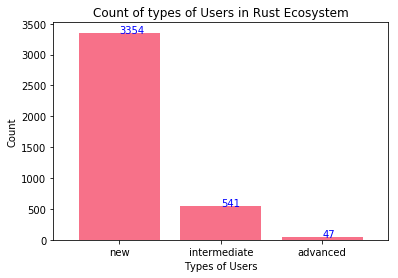

In [26]:
data['status'].value_counts().plot(kind='bar')

#Add count over the bar
ax=data['status'].value_counts().plot.bar(width=.8)
for i, v in data['status'].value_counts().reset_index().iterrows():
    ax.text(i, v.status + 0.3, v.status, color='blue')
    
plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Types of Users')
plt.ylabel('Count')
plt.title('Count of types of Users in Rust Ecosystem')
plt.show()